In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
import openpyxl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#Importing the dataset
avgtemp=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\average_temperature.csv")


In [3]:
avgtemp

,Year,Month,past,pasttopast,average_temperature
0,1990,1,12.108125,11.050000,12.588750
1,1990,2,14.452500,15.178750,15.335000
2,1990,3,15.103125,13.740000,12.610000
3,1990,4,14.403125,11.754375,13.065625
4,1990,5,12.381250,11.821875,11.961875
...,...,...,...,...,...
355,2019,8,11.032500,9.946875,11.420000
356,2019,9,11.842500,9.078750,10.181250
357,2019,10,10.403750,8.433750,7.058750
358,2019,11,9.977500,7.663750,7.326875


In [4]:
avgtemp.shape

(360, 5)

In [5]:
avgtemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 360 non-null    int64  
 1   Month                360 non-null    int64  
 2   past                 360 non-null    float64
 3   pasttopast           360 non-null    float64
 4   average_temperature  360 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 14.2 KB


In [6]:
#Creating correlation matrix for precipitation
corr_matrix=avgtemp.corr()
corr_matrix

,Year,Month,past,pasttopast,average_temperature
Year,1.000000e+00,2.844429e-15,-0.094683,-0.104498,-0.093443
Month,2.844429e-15,1.000000e+00,-0.655254,-0.657979,-0.657726
past,-9.468276e-02,-6.552537e-01,1.000000,0.648920,0.640758
pasttopast,-1.044984e-01,-6.579787e-01,0.648920,1.000000,0.673349
average_temperature,-9.344292e-02,-6.577260e-01,0.640758,0.673349,1.000000


In [7]:
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True

c:\Users\C KIRANMAYI\anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


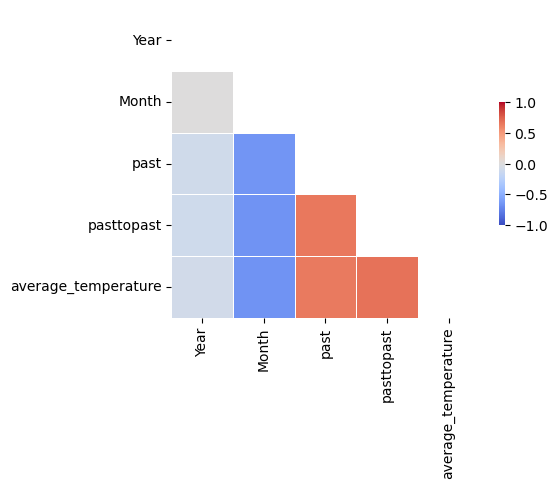

In [8]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [9]:
avgtemp=avgtemp.drop(['Year','Month'],axis=1)

In [10]:
avgtemp.shape

(360, 3)

In [11]:
X=avgtemp.drop('average_temperature',axis=1)
y=avgtemp.average_temperature

In [12]:
X

,past,pasttopast
0,12.108125,11.050000
1,14.452500,15.178750
2,15.103125,13.740000
3,14.403125,11.754375
4,12.381250,11.821875
...,...,...
355,11.032500,9.946875
356,11.842500,9.078750
357,10.403750,8.433750
358,9.977500,7.663750


In [13]:
y

0      12.588750
1      15.335000
2      12.610000
3      13.065625
4      11.961875
         ...    
355    11.420000
356    10.181250
357     7.058750
358     7.326875
359     7.031250
Name: average_temperature, Length: 360, dtype: float64

In [14]:
X.shape

(360, 2)

In [15]:
y.shape

(360,)

In [16]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping data for LSTM/GRU/RNN (samples, timesteps, features)
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

### GRU(Gated Recurrent Unit)

In [17]:
def create_gru_model(units=64):
    # model = Sequential()
    # model.add(GRU(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    # model.add(Dense(1))
    # model.compile(optimizer=Adam(), loss='mse')
    # return model
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))  # Adding a dropout layer
    model.add(GRU(units=64, return_sequences=False))
    model.add(Dropout(0.2))  # Another dropout layer
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [18]:
gru_model = KerasRegressor(build_fn=create_gru_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_25320\2098133132.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  gru_model = KerasRegressor(build_fn=create_gru_model, verbose=0)


In [19]:
# Define the hyperparameter grid
gru_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [20]:
gru_grid = GridSearchCV(estimator=gru_model, param_grid=gru_param_grid, cv=3, scoring='neg_mean_squared_error')

In [21]:
gru_grid_result = gru_grid.fit(X_train, y_train)

In [22]:
print(f"Best GRU params: {gru_grid_result.best_params_}")
print(f"Best GRU score: {gru_grid_result.best_score_}")

Best GRU params: {'batch_size': 16, 'epochs': 100, 'units': 32}
Best GRU score: -1.6092048299282495


### LSTM(Long Short Term Memory)

In [23]:
def create_lstm_model(units=64):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [24]:
lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_25320\1916978622.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)


In [25]:
# Define the hyperparameter grid
lstm_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [26]:
lstm_grid = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, scoring='neg_mean_squared_error')

In [27]:
lstm_grid_result = lstm_grid.fit(X_train, y_train)

In [28]:
print(f"Best LSTM params: {lstm_grid_result.best_params_}")
print(f"Best LSTM score: {lstm_grid_result.best_score_}")

Best LSTM params: {'batch_size': 16, 'epochs': 100, 'units': 128}
Best LSTM score: -1.6749562905916378


### RNN (Recurrent Neural Network)

In [29]:
def create_rnn_model(units=64):
    model = Sequential()
    model.add(SimpleRNN(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [30]:
rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_25320\361697586.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)


In [31]:
rnn_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [32]:
rnn_grid = GridSearchCV(estimator=rnn_model, param_grid=rnn_param_grid, cv=3, scoring='neg_mean_squared_error')

In [33]:
rnn_grid_result = rnn_grid.fit(X_train, y_train)

In [34]:
print(f"Best SimpleRNN params: {rnn_grid_result.best_params_}")
print(f"Best SimpleRNN score: {rnn_grid_result.best_score_}")

Best SimpleRNN params: {'batch_size': 16, 'epochs': 100, 'units': 128}
Best SimpleRNN score: -1.7682450536598198


In [35]:
# Evaluating GRU model on test data
best_gru_model = gru_grid_result.best_estimator_
y_pred_gru = best_gru_model.predict(X_test)
mse_gru = mean_squared_error(y_test, y_pred_gru)

print(f"GRU Model - MSE: {mse_gru}")

# Evaluating LSTM model on test data
best_lstm_model = lstm_grid_result.best_estimator_
y_pred_lstm = best_lstm_model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)


print(f"LSTM Model - MSE: {mse_lstm}")

# Evaluating SimpleRNN model on test data
best_rnn_model = rnn_grid_result.best_estimator_
y_pred_rnn = best_rnn_model.predict(X_test)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)


print(f"SimpleRNN Model - MSE: {mse_rnn}")


GRU Model - MSE: 1.3746298560651673
LSTM Model - MSE: 1.2596897220938095
SimpleRNN Model - MSE: 1.1681616130899366


## GRU is sutaible for Average Temperature with MSE of 0.95

In [54]:
avgtemp2021=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\average_temperature.csv")

In [55]:
avgtemp2021=avgtemp2021.drop(['Year','Month'],axis=1)

In [56]:
avgtemp2021

,past,pasttopast
0,11.646250,10.810625
1,12.684375,13.856250
2,13.745000,14.422500
3,12.303750,11.251875
4,11.743125,9.826250
5,10.651875,10.295625
6,10.758125,10.248125
7,11.420000,11.032500
8,10.181250,11.842500
9,7.058750,10.403750


In [57]:
avgtemp2020_pred=[]

In [58]:
avgtemp2021_scaled = scaler.transform(avgtemp2021)

# Reshape for prediction
avgtemp2021_scaled = np.reshape(avgtemp2021_scaled, (avgtemp2021_scaled.shape[0], avgtemp2021_scaled.shape[1], 1))


In [59]:
best_model = lstm_grid_result.best_estimator_

avgtemp2020_pred=best_model.predict(avgtemp2021_scaled)

In [60]:
avgtemp2020_pred

array([11.284479, 12.406272, 13.076112, 11.734393, 11.160119, 10.621576,
       10.674059, 11.196328, 10.633582,  8.538132,  8.617301,  8.580602],
      dtype=float32)

In [1]:
#Predicting for 2020
avgtemp_data=pd.DataFrame(data=avgtemp2020_pred)
avgtemp_data

,0
0,11.284479
1,12.406272
2,12.076112
3,11.734393
4,11.160119
5,10.621576
6,9.674059
7,11.196328
8,9.633582
9,9.538132


In [62]:
#Exporting the predictions of 2020 into csv file
avgtemp_data.to_csv(r"C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\average_temperature1.csv")
